In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import PIL.Image
import math

import matplotlib.pyplot as plt


In [2]:
GROUND_PATH = os.path.join(os.getcwd(), 'data\\ISIC_2019_Training_GroundTruth.csv')

METADATA_PATH = os.path.join(os.getcwd(), 'data\\ISIC_2019_Training_Metadata.csv')

DERMO_PATH = os.path.join(os.getcwd(), 'data\\ISIC_2017_GroundTruth_Complete.csv')

IMAGES_PATH = os.path.join(os.getcwd(), 'data\\ISIC-example-images\\')

#Load
def csv_to_array(path, type):
    return np.genfromtxt (path, delimiter=",", dtype=type, names=True)

def orderData(labels, data):
    ordered_labels = [x for _,x in sorted(zip(data, labels), reverse=True)]
    ordered_values = sorted(data, reverse=True)
    
    return ordered_labels, ordered_values

#Converts the loaded csv file to array
ground_array = csv_to_array(GROUND_PATH, int)
metadata_array = csv_to_array(METADATA_PATH, None)
dermo_array = csv_to_array(DERMO_PATH, None)

C:\Users\el295904\AppData\Local\Temp\ipykernel_15288\2240407921.py:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  return np.genfromtxt (path, delimiter=",", dtype=type, names=True)


Bar chart describing the class distribution of skin lesion diagnosis and number of image samples.

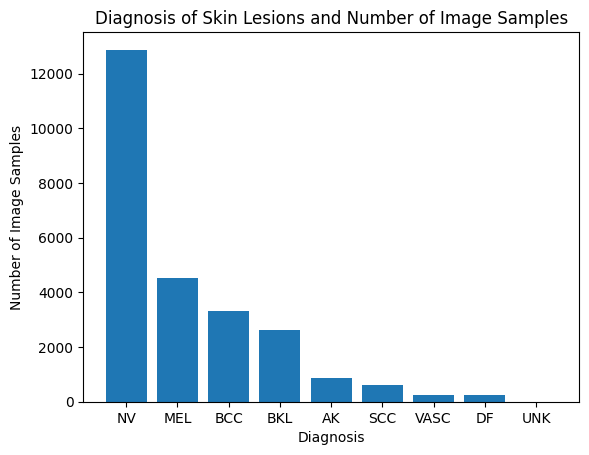

In [3]:
names = ground_array.dtype.names
names = np.delete(names, 0)
data = []

for i in names:
    data.append(np.sum(ground_array[i], axis=0))

ordered_labels, ordered_values = orderData(names, data)

plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Diagnosis of Skin Lesions and Number of Image Samples")

plt.bar(ordered_labels, ordered_values)

plt.show()

Number of male and female patients

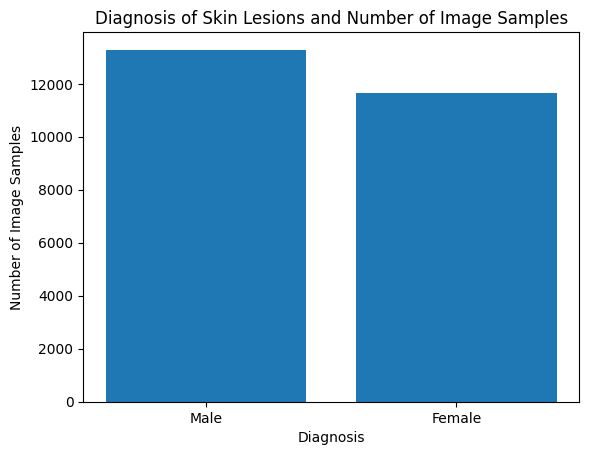

In [4]:
sex = metadata_array['sex']

sex_label = [
    'Male', 
    'Female'
]

sex_values = []

female, male = 0, 0

for i in range(0, sex.shape[0]):
    
    if sex[i] == b'female':
        female += 1
        
    if sex[i] == b'male':
        male += 1

sex_values.append(male)
sex_values.append(female)

plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Diagnosis of Skin Lesions and Number of Image Samples")

plt.bar(sex_label, sex_values)

plt.show()

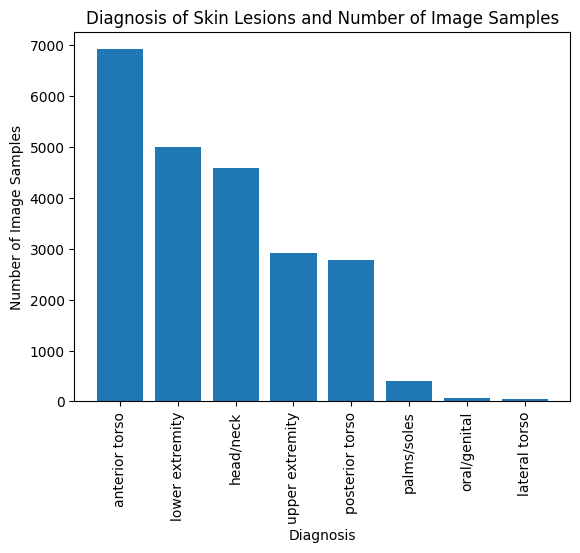

In [5]:
anatom = metadata_array['anatom_site_general']

anatom_list = ['anterior torso', 'head/neck', 'lateral torso', 'lower extremity', 'oral/genital', 'palms/soles', 'posterior torso', 'upper extremity']

anatom_list2 = [b'anterior torso', b'head/neck', b'lateral torso', b'lower extremity', b'oral/genital', b'palms/soles', b'posterior torso', b'upper extremity'] 

anatom_values = [0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, anatom.shape[0]):
    for j in range(0, len(anatom_list2)):
        if anatom[i] == anatom_list2[j]:
            anatom_values[j] += 1

ordered_labels, ordered_values = orderData(anatom_list, anatom_values)

plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Diagnosis of Skin Lesions and Number of Image Samples")

plt.xticks(rotation=90)

plt.bar(ordered_labels, ordered_values)

plt.show()

Age distribution and number of image samples

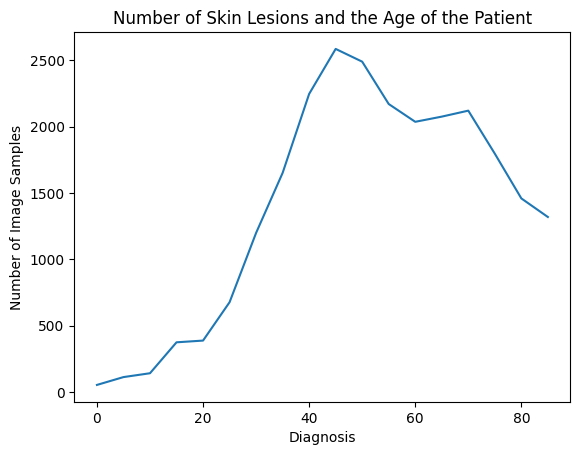

In [6]:
age = metadata_array['age_approx']

age_labels, age_values = [], []

for i in range(0, 90, 5):
    age_labels.append(i)
    age_values.append(0)


for i in range(0, age.shape[0]):
    for j in range(0, len(age_labels)):
        if age[i] == age_labels[j] and age[i] != -1:
            age_values[j] += 1


plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Number of Skin Lesions and the Age of the Patient")

plt.plot(age_labels, age_values)

plt.show()

Multi-bar graph showing type of skin lesion for each gender based on the diagnosis

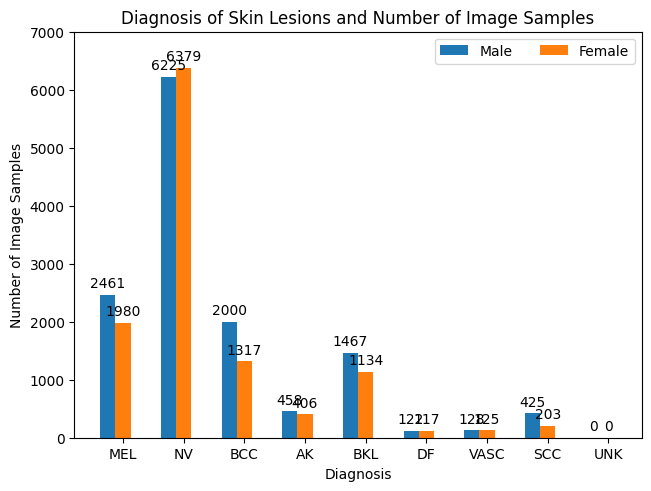

In [7]:
sex = metadata_array['sex']

names = ground_array.dtype.names
names = np.delete(names, 0)
data = []

sex_label = {
    'Male': [], 
    'Female': [],
}

for i in names:
    female = 0
    male = 0
    for k in range(0, sex.shape[0]):
        if sex[k] == b'female' and ground_array[i][k] == 1:
            female += 1
        elif sex[k] == b'male' and ground_array[i][k] == 1:
            male += 1
    sex_label['Female'].append(female)
    sex_label['Male'].append(male)


x = np.arange(len(names)) 
width = 0.25
multiplier = 0


fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in sex_label.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Diagnosis of Skin Lesions and Number of Image Samples")
ax.set_xticks(x + width, names)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 7000)

plt.show()

Multi-bar chart shows the number of images based on skin lesion diagnosis and location.

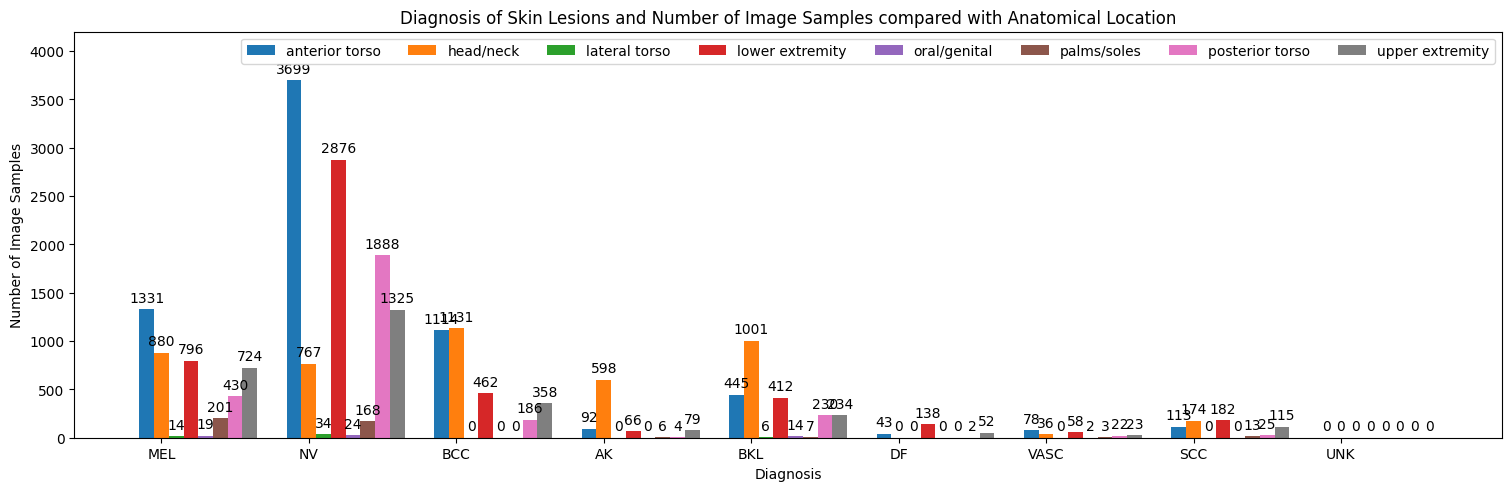

In [8]:
anatom = metadata_array['anatom_site_general']

names = ground_array.dtype.names
names = np.delete(names, 0)
data = []

anatom_list = ['anterior torso', 'head/neck', 'lateral torso', 'lower extremity', 'oral/genital', 'palms/soles', 'posterior torso', 'upper extremity']

anatom_list2 = [b'anterior torso', b'head/neck', b'lateral torso', b'lower extremity', b'oral/genital', b'palms/soles', b'posterior torso', b'upper extremity'] 



anatom_label = {
    'anterior torso': [], 
    'head/neck': [],
    'lateral torso': [],
    'lower extremity': [],
    'oral/genital': [],
    'palms/soles': [],
    'posterior torso': [],
    'upper extremity': [],
}

for i in names:
    anatom_values = [0, 0, 0, 0, 0, 0, 0, 0]
    for j in range(0, anatom.shape[0]):
    
        for k in range(0, len(anatom_list)):
            if anatom[j] == anatom_list2[k] and ground_array[i][j] == 1:
                 anatom_values[k] += 1

    for k in range(0, len(anatom_list)):
        anatom_label[anatom_list[k]].append(anatom_values[k])


x = np.arange(len(names)) 
width = 0.1
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_figwidth(15)

for attribute, measurement in anatom_label.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Diagnosis of Skin Lesions and Number of Image Samples compared with Anatomical Location")
ax.set_xticks(x + width, names)

ax.legend(loc='upper right', ncols=8)
ax.set_ylim(0, 4200)

plt.show()

Boxplot of Age and diagnosis of skin lesion

C:\Users\el295904\AppData\Local\Temp\ipykernel_15288\2328714783.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


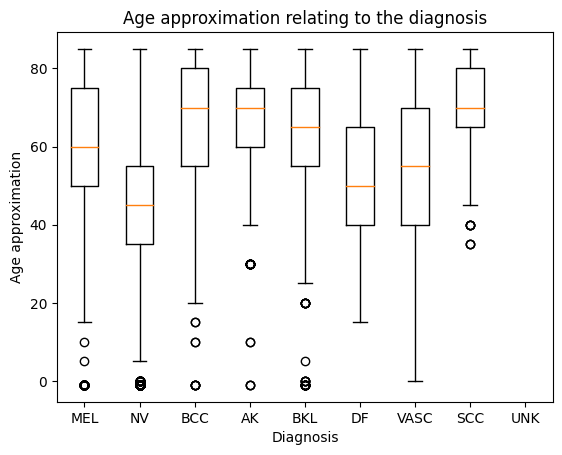

In [9]:
age = metadata_array['age_approx']

names = ground_array.dtype.names
names = np.delete(names, 0)
data_labels = []
data_values = []

for i in range(0, 90, 5):
    data_labels.append(i)

data_values = [[] for _ in range(0, names.shape[0])] #??? not to declare each array as a reference

sorted_diagnosis = []

for j in range(0, len(ground_array)): #Each Data label
    for i in range(0, names.shape[0]):
        if ground_array[names[i]][j] == 1:
            sorted_diagnosis.append(i)

for i in range(0, age.shape[0]): #For each image
        data_values[sorted_diagnosis[i]].append(age[i])
    
fig = plt.figure()
ax = fig.add_subplot()

ax.set_xticklabels(names)

plt.ylabel("Age approximation")
plt.xlabel("Diagnosis")
plt.title("Age approximation relating to the diagnosis")

ax.boxplot(data_values)

plt.show()

Boxplot showing the age and anatomical lcoation

C:\Users\el295904\AppData\Local\Temp\ipykernel_15288\2245375068.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(anatom_labels)


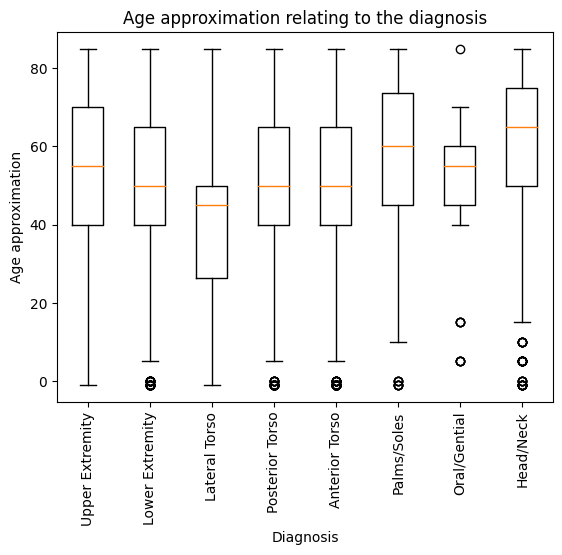

In [10]:
age = metadata_array['age_approx']

anatom = metadata_array['anatom_site_general']

anatom_labels = ['Upper Extremity', 'Lower Extremity', 'Lateral Torso', 'Posterior Torso', 'Anterior Torso', 'Palms/Soles', 'Oral/Gential', 'Head/Neck']

anatom_labels2 = [b'upper extremity', b'lower extremity', b'lateral torso', b'posterior torso',   b'anterior torso', b'palms/soles', b'oral/genital', b'head/neck'] 

data_labels = []
data_values = []

for i in range(0, 90, 5):
    data_labels.append(i)

data_values = [[] for _ in range(0, len(anatom_labels))] #??? not to declare each array as a reference

for i in range(0, age.shape[0]): #For each image
    for j in range(0, len(anatom_labels2)): #For each age, anatom
        if(anatom[i] == anatom_labels2[j]):
            data_values[j].append(age[i])


fig = plt.figure()
ax = fig.add_subplot()

ax.set_xticklabels(anatom_labels)
plt.xticks(rotation=90)

plt.ylabel("Age approximation")
plt.xlabel("Diagnosis")
plt.title("Age approximation relating to the diagnosis")

ax.boxplot(data_values)

plt.show()

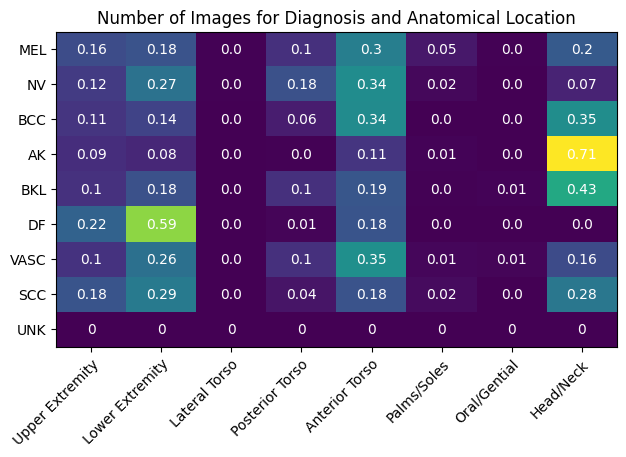

In [11]:
anatom = metadata_array['anatom_site_general']

anatom_labels = ['Upper Extremity', 'Lower Extremity', 'Lateral Torso', 'Posterior Torso', 'Anterior Torso', 'Palms/Soles', 'Oral/Gential', 'Head/Neck']

anatom_labels2 = [b'upper extremity', b'lower extremity', b'lateral torso', b'posterior torso',   b'anterior torso', b'palms/soles', b'oral/genital', b'head/neck'] 

names = ground_array.dtype.names
names = np.delete(names, 0)

grid = []
diagnosis_sum = []


for i in range(0, len(names)):
    grid.append([])

    for j in range(0, len(anatom_labels)):
        grid[i].append(0)


for d in range(0, len(names)):
    for s in range(0, anatom.shape[0]):
        for j in range(0, len(anatom_labels)):    
                if ground_array[names[d]][s] == 1 and anatom[s] == anatom_labels2[j]:
                    grid[d][j] += 1
                
for i in range(0, len(grid)):
    sum = 0
    for j in range(0, len(grid[i])):
        
            sum += grid[i][j]

    for j in range(0, len(grid[i])):
        if(sum != 0):
            grid[i][j] /= sum

fig, ax = plt.subplots()
im = ax.imshow(grid)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(anatom_labels)), labels=anatom_labels)
ax.set_yticks(np.arange(len(names)), labels=names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation = 45, ha="right",
         rotation_mode="anchor")

#Loop over data dimensions and create text annotations.
for i in range(len(names)):
    for j in range(len(anatom_labels)):
        text = ax.text(j, i, round(grid[i][j], 2),
                       ha="center", va="center", color="w")
ax.set_aspect(aspect=0.5)

ax.set_title("Number of Images for Diagnosis and Anatomical Location")
fig.tight_layout()
plt.show()

Linking dermoscopic structures to the ISIC 2019 dataset

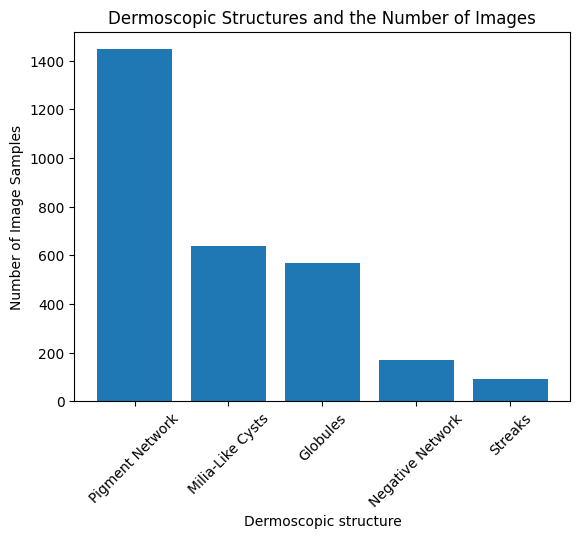

In [12]:
dermo_list = ['Globules', 'MiliaLike_Cysts', 'Negative_Network', 'Pigment_Network', 'Streaks']

dermo_labels = ['Globules', 'Milia-Like Cysts', 'Negative Network', 'Pigment Network', 'Streaks']

dermo_values = [0, 0, 0, 0, 0]

for i in range(0, dermo_array.shape[0]):
    for j in range(0, len(dermo_list)):
        dermo_values[j] += dermo_array[dermo_list[j]][i]

ordered_labels, ordered_values = orderData(dermo_labels, dermo_values)

plt.ylabel("Number of Image Samples")
plt.xlabel("Dermoscopic structure")
plt.title("Dermoscopic Structures and the Number of Images")

plt.xticks(rotation=45)

plt.bar(ordered_labels, ordered_values)

plt.show()

C:\Users\el295904\AppData\Local\Temp\ipykernel_15288\75046381.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d].set_xticklabels(structures_names, rotation=45)


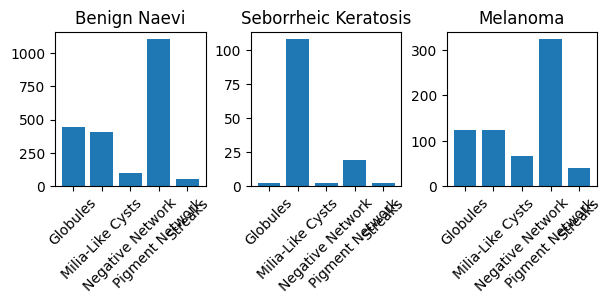

In [13]:
structures_labels = ['Globules', 'MiliaLike_Cysts', 'Negative_Network', 'Pigment_Network', 'Streaks']

structures_names = ['Globules', 'Milia-Like Cysts', 'Negative Network', 'Pigment Network', 'Streaks']

diagnosis_labels = ['Benign_Naevi', 'seborrheic_keratosis', 'melanoma']

diagnosis_names = ['Benign Naevi', 'Seborrheic Keratosis', 'Melanoma']

fig, ax = plt.subplots(1, 3, figsize = (7, 2))
fig.subplots_adjust(hspace = 0.9, wspace = 0.3)

ax = ax.ravel()

#fig.delaxes(ax[3])

for d in range(0, len(diagnosis_labels)):
    values = [0, 0, 0, 0, 0]
    for s in range(0, len(structures_labels)):
        for i in range(0, dermo_array[structures_labels[s]].shape[0]):
                 
                if dermo_array[diagnosis_labels[d]][i] == 1 and dermo_array[structures_labels[s]][i] == 1:
                    values[s] += 1

    #ordered_labels, ordered_values = orderData(colors_labels, colors_values)
    ax[d].set_title(diagnosis_names[d])
    ax[d].bar(structures_names, values)
    ax[d].set_xticklabels(structures_names, rotation=45)

plt.show()


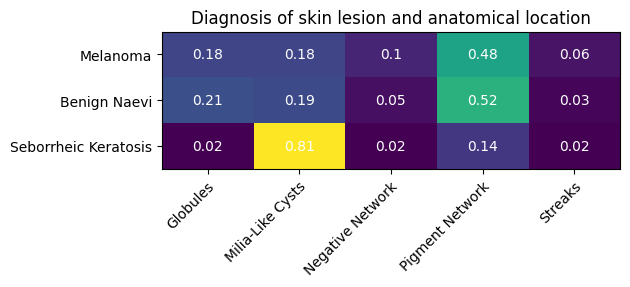

In [14]:
structures_labels = ['Globules', 'MiliaLike_Cysts', 'Negative_Network', 'Pigment_Network', 'Streaks']

structures_names = ['Globules', 'Milia-Like Cysts', 'Negative Network', 'Pigment Network', 'Streaks']

diagnosis_labels = ['melanoma', 'Benign_Naevi', 'seborrheic_keratosis']

diagnosis_names = ['Melanoma', 'Benign Naevi', 'Seborrheic Keratosis']

grid = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]])


for d in range(0, len(diagnosis_labels)):
    for s in range(0, len(structures_labels)):
        for i in range(0, dermo_array[structures_labels[s]].shape[0]):
                 
                if dermo_array[diagnosis_labels[d]][i] == 1 and dermo_array[structures_labels[s]][i] == 1:
                    grid[d][s] += 1

grid = grid.astype(np.float32)
for i in range(0, len(grid)):
    v = 0

    for j in range(0, len(grid[i])):
        v += grid[i][j] 
    
    for j in range(0, len(grid[i])):
        grid[i][j] /= v





 
fig, ax = plt.subplots()
im = ax.imshow(grid)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(structures_names)), labels=structures_names)
ax.set_yticks(np.arange(len(diagnosis_names)), labels=diagnosis_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(diagnosis_labels)):
    for j in range(len(structures_labels)):
        text = ax.text(j, i, round(grid[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_aspect(aspect=0.5)

ax.set_title("Diagnosis of skin lesion and anatomical location")
fig.tight_layout()
plt.show()

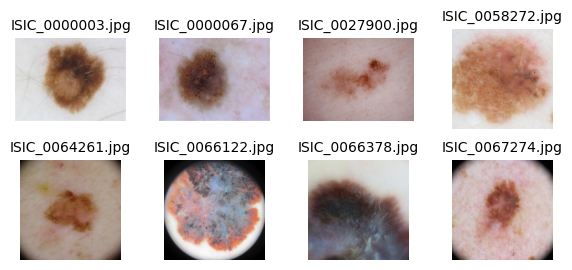

In [15]:
images = os.listdir(IMAGES_PATH)

bn_path = os.path.join(IMAGES_PATH, 'BN\\')

sk_path = os.path.join(IMAGES_PATH, 'SK\\')

mm_path = os.path.join(IMAGES_PATH, 'MM\\')

bn_img = os.listdir(bn_path)

sk_img = os.listdir(sk_path)

mm_img = os.listdir(mm_path)

img_arr = []

names = []

def load_image(img, path):
    img = PIL.Image.open(path+img).convert('RGB')
    return img

def image_names(list, path):
    for image in list:
        img_arr.append(load_image(image, path))
        names.append(image)

image_names(bn_img, bn_path)
image_names(sk_img, sk_path)
image_names(mm_img, mm_path)

fig, axarr = plt.subplots(2,4, figsize = (7, 3))

fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

ax = axarr.ravel()

for i in range(0, len(img_arr)):
    ax[i].axis('off')
    ax[i].imshow(img_arr[i])
    ax[i].set_title(names[i], fontsize = 10)



ISIC SegNet model

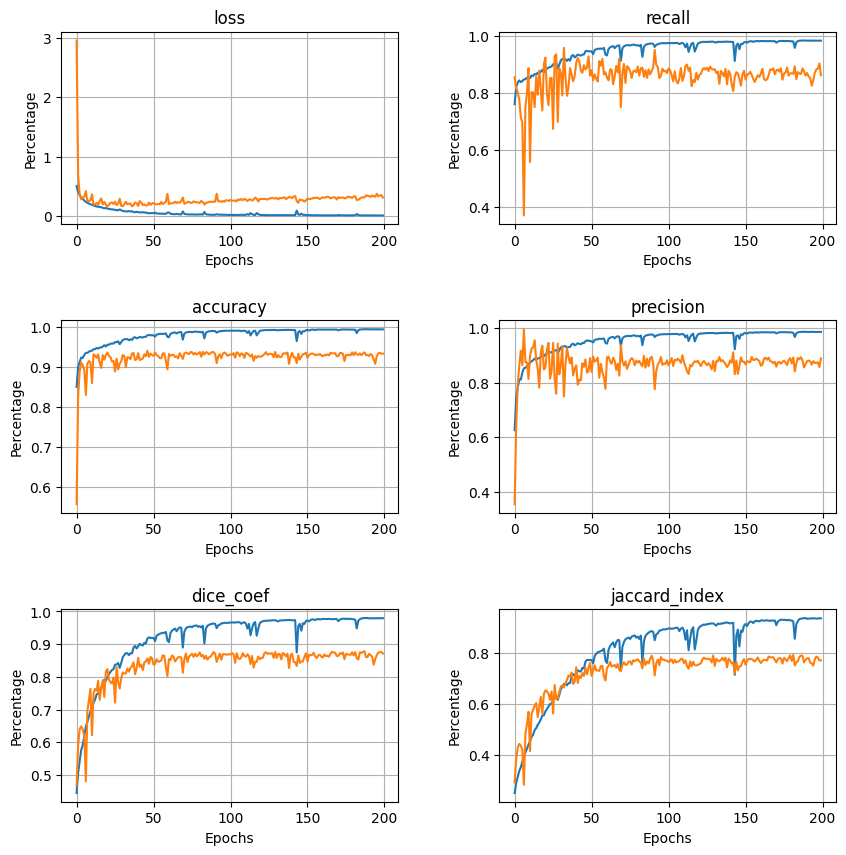

In [16]:
SEGNET_PATH = os.path.join(os.getcwd(), 'data\\metrics-SegNet.csv')

segnet_metrics = csv_to_array(SEGNET_PATH, float)

metrics_labels = ['loss','recall','accuracy','precision','dice_coef','jaccard_index']

metrics_labels_val = ['val_loss','val_recall','val_accuracy','val_precision','val_dice_coef','val_jaccard_index']

fig, ax = plt.subplots(3, 2, figsize = (10, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)

ax = ax.ravel()

for m in range(0, len(metrics_labels)):

    ax[m].plot(segnet_metrics[metrics_labels[m]])
    ax[m].plot(segnet_metrics[metrics_labels_val[m]])

    ax[m].grid(True)
    ax[m].set_xlabel("Epochs")
    ax[m].set_ylabel("Percentage")
    ax[m].set_title(metrics_labels[m])
    #ax[m].set_xticklabels(structures_names, rotation=45)

plt.show()

